In [1]:
import numpy as np
import os
import cv2

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

from keras.losses import binary_crossentropy
import keras.backend as K
import tensorflow as tf 

import matplotlib.pyplot as plt

<h1>Load in Files<h1>

In [2]:
#Helper function to pad np array to max(n,m) x max(n,m) if array is nxm
def squarify(M,val=0,change_dim=0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)


In [256]:
for i in which_stacks:
    print(np.load(stack_files_npy[i]).shape)

(346, 311, 209)
(321, 304, 209)
(322, 285, 209)
(308, 281, 209)
(336, 318, 254)
(359, 300, 308)
(369, 342, 287)
(328, 316, 259)
(321, 302, 262)


In [230]:
mask_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\MasksEpi"
mask_files = [os.path.join(mask_path,i) for i in os.listdir(mask_path)]
mask_files_npy = []
for file in os.listdir(mask_path):
    if file.endswith(".npy"):
        mask_files_npy.append(os.path.join(mask_path, file))

stacks_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\Stacks"
stacks_files = [os.path.join(stacks_path,i) for i in os.listdir(stacks_path)]
stack_files_npy = []

for file in os.listdir(stacks_path):
    if file.endswith(".npy"):
        stack_files_npy.append(os.path.join(stacks_path, file))
        
#stack_slices = np.load(stack_files_npy[10])[100:175]
#mask_slices = np.load(mask_files_npy[10])[100:175]
which_stacks = np.array([0,5,10,15,44, 26, 45, 38, 43])
stack_slices = np.load(stack_files_npy[10])[100:175]
mask_slices = np.load(mask_files_npy[10])[100:175]

stack_list = []
mask_list = []

for i in range(stack_like.shape[0]):
    temp_slice = squarify(stack_slices[i],0,change_dim=1)[:256,:256]
    temp_slice = feature.canny(temp_slice, sigma=5)
    stack_list.append(temp_slice)
    
    temp_mask = squarify(mask_slices[i],0,change_dim=1)[:256,:256]
    temp_mask = feature.canny(temp_mask.astype(np.float32),sigma=5)
    mask_list.append(temp_mask)
    #stack_list.append(squarify(stack_slices[i],0,change_dim=1)[:256,:256])
    #mask_list.append(squarify(mask_slices[i],0,change_dim=1)[:256,:256])
    
u_stack = np.asarray(np.expand_dims(stack_list, axis=-1))
u_mask = np.expand_dims(mask_list, axis=-1)

#clear temp stuff out of memory
#del stack_slices,mask_slices,stack_list,mask_list,stack_like,mask_like

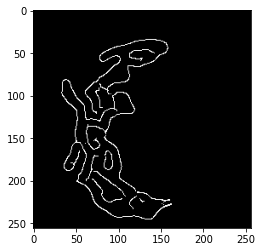

In [229]:
plt.imshow(mask_list[-1])

In [186]:
temp_stack = [feature.canny(i, sigma=5) for i in stack_slices]

In [290]:
mask_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\MasksEpi"
mask_files = [os.path.join(mask_path,i) for i in os.listdir(mask_path)]
mask_files_npy = []
for file in os.listdir(mask_path):
    if file.endswith(".npy"):
        mask_files_npy.append(os.path.join(mask_path, file))

stacks_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\Stacks"
stacks_files = [os.path.join(stacks_path,i) for i in os.listdir(stacks_path)]
stack_files_npy = []

for file in os.listdir(stacks_path):
    if file.endswith(".npy"):
        stack_files_npy.append(os.path.join(stacks_path, file))
        
#stack_slices = np.load(stack_files_npy[10])[100:175]
#mask_slices = np.load(mask_files_npy[10])[100:175]
#which volumes to use for training
which_stacks = np.array([0,5,10,15,44, 24, 25,26, 45, 38, 43])
stack_files_npy = np.asarray(stack_files_npy)
mask_files_npy = np.asarray(mask_files_npy)

stack_slices = []
mask_slices = []
for i in which_stacks:
    print(i)
    stack_slices.append(np.load(stack_files_npy[i])[100:175,:256,:209])
    mask_slices.append(np.load(mask_files_npy[i])[100:175,:256,:209])
#stack_slices = np.load(stack_files_npy[which_stacks])[100:175]
#mask_slices = np.load(mask_files_npy[which_stacks])[100:175]
#stack_slices = np.asarray(stack_slices)
#mask_slices = np.asarray(mask_slices)
stack_list = []
mask_list = []
stack_slices = np.asarray(stack_slices)
mask_slices = np.asarray(mask_slices)

for i in range(stack_slices.shape[0]):
    temp_stack = []
    temp_mask = []
    for j in range(stack_slices.shape[1]):
        
        temp_stack_slice = squarify(stack_slices[i,j],0,change_dim=1)[:256,:256]
        temp_stack_slice = feature.canny(temp_stack_slice, sigma=1)
        temp_stack_slice = np.uint8((temp_stack_slice))

        temp_mask_slice = squarify(mask_slices[i,j],0,change_dim=1)[:256,:256]
        temp_mask_slice = feature.canny(temp_mask_slice.astype(np.float32),sigma=1)
        temp_mask_slice = np.uint8((temp_mask_slice))

        temp_stack.append(temp_stack_slice)
        temp_mask.append(temp_mask_slice)
        #temp_stack.append(squarify(stack_slices[i,j],0,change_dim=1)[:256,:256])
        #temp_mask.append(squarify(mask_slices[i,j],0,change_dim=1)[:256,:256])
    
    stack_list.append(temp_stack)
    mask_list.append(temp_mask)
    #mask_list.append(squarify(mask_slices[i],0,change_dim=1)[:256,:256])
    print("volume", i, "loaded")
    
u_stack = np.asarray(stack_list).reshape(-1,256,256)
u_mask = np.asarray(mask_list).reshape(-1,256,256)
u_stack = np.asarray(np.expand_dims(u_stack, axis=-1))
u_mask = np.expand_dims(u_mask, axis=-1)

#clear temp stuff out of memory
#del stack_slices,mask_slices,stack_list,mask_list,stack_like,mask_like

0
5
10
15
44
24
25
26
45
38
43
volume 0 loaded
volume 1 loaded
volume 2 loaded
volume 3 loaded
volume 4 loaded
volume 5 loaded
volume 6 loaded
volume 7 loaded
volume 8 loaded
volume 9 loaded
volume 10 loaded


In [380]:
u_stack = u_stack.reshape(256,256,-1)

In [294]:
mystack = (np.load(stack_files_npy[43])[100:175,:256,:209])
mymask = (np.load(mask_files_npy[43])[100:175,:256,:209])

In [266]:
type(temp_stack_slice[0,0])

numpy.float64

In [275]:
np.var((u_stack[ind,:,:,0]))

0.06748685147613287

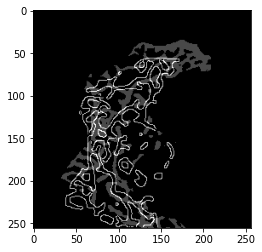

In [291]:

plt.imshow(
    cv2.addWeighted(np.float32(squarify(mymask[70,:,:])), .4,np.float32(u_mask[670,:,:,0]), 1,  0,dtype=5)
)

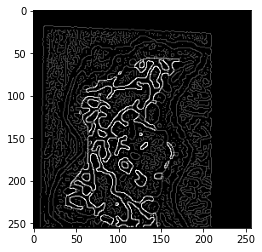

In [295]:


ind=670
plt.imshow(
    cv2.addWeighted(u_stack[ind,:,:,0], .4,u_mask[ind,:,:,0], 1,  0,dtype=5)
)

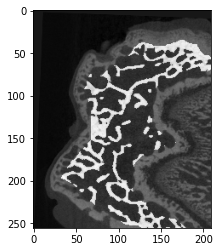

In [283]:


ind=75-5
plt.imshow(
    cv2.addWeighted(mystack[ind,:,:], .0001,mymask[ind,:,:], 1,  0,dtype=5)
)

<h1>Loss Functions<h1>

In [4]:
epsilon = 1e-5
smooth = 1

def dsc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dsc(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

def confusion(y_true, y_pred):
    smooth=1
    y_pred_pos = K.clip(y_pred, 0, 1)
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.clip(y_true, 0, 1)
    y_neg = 1 - y_pos
    tp = K.sum(y_pos * y_pred_pos)
    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg) 
    prec = (tp + smooth)/(tp+fp+smooth)
    recall = (tp+smooth)/(tp+fn+smooth)
    return prec, recall

def tp(y_true, y_pred):
    smooth = 1
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pos = K.round(K.clip(y_true, 0, 1))
    tp = (K.sum(y_pos * y_pred_pos) + smooth)/ (K.sum(y_pos) + smooth) 
    return tp 

def tn(y_true, y_pred):
    smooth = 1
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos 
    tn = (K.sum(y_neg * y_pred_neg) + smooth) / (K.sum(y_neg) + smooth )
    return tn 

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)


<h1>Unet<h1>


In [403]:
#from zhixuhao


def unet(pretrained_weights = None,input_size = (128,128,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9=up9
    merge9 = concatenate([conv1,up9], axis = 3)#was out
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-5), loss = dice_loss, metrics = ['accuracy'])#loss=focal_tversky

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


<h2> Run Unet <h2>

In [404]:
model = unet(input_size = (256,256,1))

filepath = filepath="unetv1-3-2-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit((u_stack/1000).astype('float32'),u_mask.astype('float32'),epochs=150)

Epoch 1/150
22/22 [==============================] - 1414s 64s/step - loss: 0.8136 - accuracy: 0.7645
Epoch 2/150
16/22 [====================>.........] - ETA: 6:58 - loss: 0.6280 - accuracy: 0.9297

KeyboardInterrupt: 

In [17]:
model.save("during-day-150ep-3-2.h5")

INFO:tensorflow:Assets written to: all-night-300ep-3-1\assets


In [405]:
#predict train
predict = model.predict(u_stack)

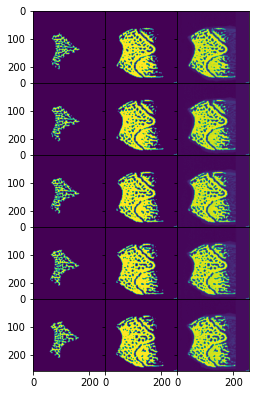

In [406]:
#f, axarr = plt.subplots(5,3,figsize=(40,40),squeeze=True)#,gridspec_kw={'wspace':0, 'hspace':0})

#f.subplots_adjust(wspace=0, hspace=0)


#tight boxes option
nrow = 5
ncol = 3
fig, axarr = plt.subplots(
    nrow, ncol,
    gridspec_kw=dict(wspace=0.0, hspace=0.0,
                     top=1. - 0.5 / (nrow + 1), bottom=0.5 / (nrow + 1),
                     left=0.5 / (ncol + 1), right=1 - 0.5 / (ncol + 1)),
    figsize=(ncol + 1, nrow + 1),
    sharey='row', sharex='col', #  optionally
)



for i in range(5):
    axarr[i,0].imshow(u_mask[i+6])
    #axarr[i,1].imshow(cv2.addWeighted( val_u_stack[40+i], 1, val_predict[40+i], .1, 0.0,dtype=cv2.CV_8UC3))
    axarr[i,1].imshow(predict[i+6])
    axarr[i,2].imshow(cv2.addWeighted(np.float32(predict[i+6]), 1,np.float32(u_stack[i+6]), .00001,  0,dtype=5))


<h4> Load model <h4>

In [16]:
from keras.models import load_model
#need to pass custom loss
model = load_model("all-night-300ep-3-1",custom_objects={'focal_tversky':focal_tversky})

In [17]:
#predict on training 
pred = model.predict(u_stack)
#predict on testing
pred = model.predict

In [ ]:
f, axarr = plt.subplots(5,3,figsize=(40,40),squeeze=True,gridspec_kw={'wspace':0, 'hspace':0})
for i in range(5):
    axarr[i,0].imshow(u_mask[i+20])
    axarr[i,1].imshow(pred[i+20])
    axarr[i,2].imshow(cv2.addWeighted(np.float32(pred[i+20]), 1,np.float32(u_stack[i+20]), .00001,  0,dtype=5))

In [ ]:
from scipy.spatial import distance
dsco = []
for i in range(predict.shape[0]):
    dsco.append(distance.dice(maska[i],prea[i]))

In [ ]:
dice(prea[0],maska[0])

In [ ]:
prea = (predict[:,:,:,0]*1000)
maska = (u_mask[:,:,:,0]*1000)

In [ ]:
maska[]

In [ ]:
plt.imshow(prea[0])

In [ ]:
plt.imshow((prea[0]*1000).astype(np.uint8))

In [ ]:
np.mean(maska[34,:,:])

<h2> dev <h2>

TODO: try adding crop_center to u_stack forloop so we get middle, not just [:256],[:256]

In [36]:
stack_slices = np.load(stack_files_npy[10])[100:150]
mask_slices = np.load(mask_files_npy[10])[100:150]

stack_list = []
mask_list = []
stack_like = np.zeros((stack_slices.shape[0],stack_slices.shape[0]))
mask_like = np.zeros((mask_slices.shape[0],mask_slices.shape[0]))

In [37]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [38]:
for i in range(stack_like.shape[0]):
    temp_stack = squarify(stack_slices[i],0,change_dim=1)
    temp_mask = squarify(mask_slices[i],0,change_dim=1)
    stack_list.append(crop_center(temp_stack,256,256))
    mask_list.append(crop_center(temp_mask,256,256))
    
u_stack = np.asarray(np.expand_dims(stack_list, axis=-1))
u_mask = np.expand_dims(mask_list, axis=-1)

#clear temp stuff out of memory
#del stack_slices,mask_slices,stack_list,mask_list,stack_like,mask_like

In [26]:
pred_val = model.predict(u_stack)

In [55]:
#f, axarr = plt.subplots(5,3,figsize=(40,40),squeeze=True)#,gridspec_kw={'wspace':0, 'hspace':0})

#f.subplots_adjust(wspace=0, hspace=0)


#tight boxes option
nrow = u_mask.shape[0]
ncol = 3
fig, axarr = plt.subplots(

    nrow, ncol,
    gridspec_kw=dict(wspace=0.0, hspace=0.0,
                     top=1. - 0.5 / (nrow + 1), bottom=0.5 / (nrow + 1),
                     left=0.5 / (ncol + 1), right=1 - 0.5 / (ncol + 1)),
    figsize=(ncol + 1, nrow + 1),
    sharey='row', sharex='col', #  optionally

)
fig = plt.gcf()
fig.set_size_inches(110,80)


for i in range(u_mask.shape[0]):
    axarr[i,0].imshow(u_mask[i])
    #axarr[i,1].imshow(cv2.addWeighted( val_u_stack[40+i], 1, val_predict[40+i], .1, 0.0,dtype=cv2.CV_8UC3))
    axarr[i,1].imshow(predict[i])
    axarr[i,2].imshow(cv2.addWeighted(np.float32(pred_val[i]), 1,np.float32(u_stack[i]), .00001,  0,dtype=5))


Error in callback <function flush_figures at 0x000001A5E91CB3A8> (for post_execute):


KeyboardInterrupt: 

In [1]:
#f, axarr = plt.subplots(5,3,figsize=(40,40),squeeze=True)#,gridspec_kw={'wspace':0, 'hspace':0})

#f.subplots_adjust(wspace=0, hspace=0)


#tight boxes option
nrow = u_mask.shape[0]
ncol = 3
fig, axarr = plt.subplots(

    nrow, ncol,
    gridspec_kw=dict(wspace=0.0, hspace=0.0,
                     top=0.1, bottom=0,
                     left=0, right=0.01),
    #figsize=(ncol + 1, nrow + 1),
    sharey='row', sharex='col', #  optionally

)
fig.set_dpi(1000)


for i in range(u_mask.shape[0]):
    axarr[i,0].imshow(u_mask[i])
    #axarr[i,1].imshow(cv2.addWeighted( val_u_stack[40+i], 1, val_predict[40+i], .1, 0.0,dtype=cv2.CV_8UC3))
    axarr[i,1].imshow(predict[i])
    axarr[i,2].imshow(cv2.addWeighted(np.float32(pred_val[i]), 1,np.float32(u_stack[i]), .00001,  0,dtype=5))


NameError: name 'u_mask' is not defined

In [18]:
diff = u_mask - pred

In [20]:
np.mean(diff)

-0.013930419

In [25]:
#load val
mask_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\MasksEpi"
mask_files = [os.path.join(mask_path,i) for i in os.listdir(mask_path)]
mask_files_npy = []
for file in os.listdir(mask_path):
    if file.endswith(".npy"):
        mask_files_npy.append(os.path.join(mask_path, file))

stacks_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\Stacks"
stacks_files = [os.path.join(stacks_path,i) for i in os.listdir(stacks_path)]
stack_files_npy = []

for file in os.listdir(stacks_path):
    if file.endswith(".npy"):
        stack_files_npy.append(os.path.join(stacks_path, file))
        
stack_slices = np.load(stack_files_npy[10])[175:250]
mask_slices = np.load(mask_files_npy[10])[175:250]

stack_list = []
mask_list = []
stack_like = np.zeros((stack_slices.shape[0],stack_slices.shape[0]))
mask_like = np.zeros((mask_slices.shape[0],mask_slices.shape[0]))

for i in range(stack_like.shape[0]):
    stack_list.append(squarify(stack_slices[i],0,change_dim=1)[:256,:256])
    mask_list.append(squarify(mask_slices[i],0,change_dim=1)[:256,:256])
    
val_u_stack = np.asarray(np.expand_dims(stack_list, axis=-1))
val_u_mask = np.expand_dims(mask_list, axis=-1)

#clear temp stuff out of memory
del stack_slices,mask_slices,stack_list,mask_list,stack_like,mask_like

In [26]:
pred_val = model.predict(val_u_stack)

In [27]:
diff_val = u_mask - pred_val

In [29]:
np.mean(diff_val)

-0.03249406

In [12]:
def dice(im1, im2, empty_score=1.0):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        Both are empty (sum eq to zero) = empty_score
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / im_sum

In [39]:
mask_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\MasksEpi"
mask_files = [os.path.join(mask_path,i) for i in os.listdir(mask_path)]
mask_files_npy = []
for file in os.listdir(mask_path):
    if file.endswith(".npy"):
        mask_files_npy.append(os.path.join(mask_path, file))

stacks_path = "C:\\Users\\15714\\Desktop\\OA Research\\24 Micron Data\\Stacks"
stacks_files = [os.path.join(stacks_path,i) for i in os.listdir(stacks_path)]
stack_files_npy = []

for file in os.listdir(stacks_path):
    if file.endswith(".npy"):
        stack_files_npy.append(os.path.join(stacks_path, file))

In [6]:
from keras.models import load_model

In [34]:
model = load_model("C:\\Users\\15714\\Downloads\\mac_model_long-3-2.hdf5",custom_objects = {"dice_loss":dice_loss})

In [41]:
full_dice = []
for file_ind in range(47):
    print(file_ind)
    stack_slices = np.load(stack_files_npy[file_ind])[100:175]
    mask_slices = np.load(mask_files_npy[file_ind])[100:175]

    stack_list = []
    mask_list = []
    stack_like = np.zeros((stack_slices.shape[0],stack_slices.shape[0]))
    mask_like = np.zeros((mask_slices.shape[0],mask_slices.shape[0]))

    for i in range(stack_like.shape[0]):
        stack_list.append(squarify(stack_slices[i],0,change_dim=1)[:256,:256])
        mask_list.append(squarify(mask_slices[i],0,change_dim=1)[:256,:256])

    temp_u_stack = np.asarray(np.expand_dims(stack_list, axis=-1))
    temp_u_mask = np.expand_dims(mask_list, axis=-1)
    pred_mask = model.predict(temp_u_stack)
    temp_dice = []
 
    for img_ind in range(temp_u_stack.shape[0]):
        temp_dice.append(dice(temp_u_mask[img_ind],pred_mask[img_ind]))
        print(np.mean(np.asarray(temp_dice)))
    full_dice.append(np.asarray(temp_dice))

    #clear temp stuff out of memory
    del stack_slices,mask_slices,stack_list,mask_list,stack_like,mask_like

0
0.8760095011876484
0.8804853235025549
0.8822630165591484
0.8829755165113333
0.8836037017567314
0.8805868761541035
0.8784967613251489
0.8780646854335175
0.8781763612122222
0.8792011448072061
0.88057737006487
0.880710808971204
0.8795092393071091
0.8808873218715714
0.8810606693016586
0.8807940304124092
0.8810757440288972
0.8807085208829721
0.8799032726802603
0.8800495861419158
0.8793674335458932
0.878420071875646
0.8779588602302671
0.8782696021651172
0.8779437352351133
0.8776488248567633
0.8776100744584597
0.8777420730513558
0.8783146773050269
0.8789923034100457
0.8797358038267065
0.8799048066514439
0.8796760067653839
0.8793217419889554
0.878742526722787
0.878428938424078
0.8782384298183038
0.8780113450081312
0.8776667063727248
0.8770196323139953
0.8765826084733206
0.876277978282815
0.8760974225949345
0.8757856883558801
0.8752767970073388
0.8749012892971966
0.8743195389179385
0.873938427612579
0.8737294163674264
0.8738341186240123
0.874068471068052
0.8742564836789698
0.8745698089106273


0.8540636042402827
0.8528516875964558
0.8618595234002373
0.8645932646305006
0.8657989411458648
0.870847461858077
0.8757909429817338
0.8776616129241431
0.8778340429488014
0.8763582311263416
0.8738843598300717
0.8714984611836342
0.8693806520271055
0.8655631950951751
0.8620158998863655
0.8605886532960874
0.8592933004450407
0.8593212730295728
0.8605758892071592
0.8619322008141502
0.8627024397148982
0.8635419503854831
0.862465578171658
0.861556370068937
0.8605874485995129
0.858718460089359
0.8577326647025072
0.8573333910425559
0.8568222804236486
0.8563841313051582
0.8562421729450976
0.8568316663573194
0.8575389829324048
0.858197519358975
0.8587908454130476
0.8595247320534554
0.8602939828894974
0.8608088317558525
0.8614890972185797
0.861922486592389
0.862391342644417
0.8628274682035479
0.8630156021046465
0.8631507930457194
0.8631808833915705
0.8631011087496979
0.8627562442342174
0.8621858258605718
0.8615182938288464
0.8611476294448067
0.8610101335409058
0.8608595185838576
0.860794015857941
0

0.8010194079592237
0.8076941699990293
0.8126157325646965
0.8097533977468321
0.8134382008661202
0.8142995655452303
0.814194713917515
0.8143964442934891
0.8151828468535391
0.8137489355202682
0.814300107126135
0.815671612751598
0.8170073373723964
0.8180402886783816
0.8185213664735996
0.8192551273916255
0.8195674428736451
0.8199456516904858
0.8194997716585788
0.818219168292423
0.8178897145479672
0.8179138873050952
0.8181140841436289
0.818682261438187
0.8192261102211659
0.8199500240852354
0.8206985932095127
0.8212572508838017
0.8217732240409447
0.8218373998689846
0.8212869875870783
0.82066535624742
0.8202378703050611
0.8202536198817673
0.8201348059635271
0.819707352855287
0.8196076068197928
0.819682373029495
0.8200006572702664
0.8205746750449443
0.8211663112600539
0.8214637451963709
0.8217872584770725
0.8222012911341113
0.822503364173685
0.8228985561772882
0.8232512184758677
0.8234090015145942
0.8233693873669651
0.8235053226720583
0.8235535771935977
0.8234852013185244
0.8236073204272247
0.8

0.8354260840448686
0.8363677802596775
0.8387745478069698
0.8399272143571729
0.8401556471623005
0.8379996921373252
0.8361870708294445
0.8329616068657417
0.8309883429384618
0.8295314300419955
0.8297407464049598
0.8299751405325321
0.8308204562813954
0.8313519143730971
0.8321877640431333
0.8327732318025782
0.8328452863403362
0.83255074909207
0.832520442383545
0.8320008299180269
0.8320367338382928
0.8317619676428372
0.8317128748755711
0.8317367965689098
0.8318229274999583
0.8318279452319264
0.8317744217536291
0.8312864965892854
0.8305355554122061
0.8297618812608339
0.8293667811660362
0.8289546872321256
0.828549040121946
0.8283819153561548
0.8278377883838763
0.8273907997681325
0.8272084146382385
0.826951911232209
0.8265272677457808
0.8263000380862057
0.8257935459726476
0.8253749236822647
0.824727804459302
0.8240462188087677
0.8232916842996534
0.8223525374854153
0.8216836224750457
0.8210041505400776
0.8203546168785943
0.8197279199974801
0.8191017404058292
0.8185976233350772
0.8182917218513325

0.5525135344160866
0.55092343387471
0.5510464033398158
0.5457209548217299
0.5387251715977466
0.5314660028336599
0.5291863859807833
0.5295085872050429
0.5312360317448376
0.5308080326621426
0.5273108589249119
0.5220666162836319
0.519005709955837
0.5151687984866666
0.512302933563545
0.5094609043927274
0.5054011126310637
0.502323883406913
0.4988777887155705
0.49769616385631166
0.49630134048459257
0.49365883915804926
0.49064421153451976
0.48779183053021824
0.48640038040341144
0.4849746119940089
0.48308832957410114
0.4825311830761869
0.4817516988436759
0.4806004588166976
0.480420037379451
0.48074593963813445
0.4801684744195948
0.47987042644271183
0.4792383136550127
0.4779153984506277
0.47701077807208214
0.4758707418113521
0.47548678008419454
0.4751805084175145
0.4746415474785403
0.47375784760562595
0.4726510896707984
0.4705741969908674
0.46870012610649797
0.46750753971029363
0.46636545987037337
0.465133870139576
0.46416611653971246
0.46304066942221295
0.46158453553616136
0.46007818655294724


0.7908340573414422
0.791755752839634
0.7901162940464287
0.7769799203460235
0.768906924664446
0.7634363205470303
0.7574198835497421
0.7561596042033307
0.7539618478623819
0.7492673996456573
0.7468867390920454
0.744191848452548
0.7404106936471936
0.7378961307189703
0.7353924234799682
0.7325202492114607
0.7299633625155382
0.7269573987117534
0.7226469088104842
0.7184241528663868
0.7137573247260939
0.7098059220238458
0.7054861561277354
0.7012384200241706
0.6973944698153826
0.6937305121023294
0.6910648812032513
0.6889977318184065
0.6863779025034589
0.6831085681646911
0.6795782718520119
0.6772085329331567
0.6750745485584511
0.6735339005314581
0.6728812371312255
0.672452425135083
0.6722896347828689
0.672119491938149
0.6714856501147433
0.6699792404654475
0.6674749424000659
0.6656147581744319
0.6646678409865361
0.6647462966688461
0.6650598008015552
0.665791715855155
0.6664896570905885
0.6677161345870987
0.6697332300987958
0.6714849893014835
0.6734906177524793
0.6752375709731567
0.6765440740605412

0.63167142543378
0.6419788427022849
0.656641662618962
0.6655452577072832
0.6731019731473831
0.675638628666242
0.6728467022434418
0.6741012500700063
0.6719745201527157
0.6653386317846314
0.6612046088711865
0.657708749030849
0.656666912701673
0.6542315009504459
0.6522596237043345
0.6538996094051452
0.6537317893193717
0.6539197353821544
0.653074490483332
0.6517619888388497
0.6486849383244275
0.6449973352725316
0.6414488793394092
0.6394305641488206
0.6375923855875665
0.6350911755339138
0.6333065517161328
0.6321464264858241
0.631228913869701
0.6299369696818875
0.6284688609028837
0.6264295739631722
0.624117284851261
0.6226513130426974
0.6204578303977768
0.6191326187273031
0.6176702406682373
0.6157698276362981
0.6131795456911545
0.6103880070271901
0.6076029418051417
0.6055704470849742
0.6038602096162979
0.6019332247739521
0.6004242789660604
0.5990542022971004
0.5979074223200129
0.59792162269084
0.5980249756865215
0.5979198842496056
0.5975906279749538
0.597136366939287
0.5964280701792148
0.596

0.65426114151681
0.6445551542793415
0.6430407330550346
0.6505233807857849
0.6545675323554373
0.6559416128346267
0.6520017895445335
0.6473564485574134
0.6403004630009951
0.6344184679695327
0.6297237207473355
0.6288760579191196
0.629212604545698
0.629407869129922
0.6266511742012806
0.6257178655437863
0.6232980069136129
0.62083444582495
0.6177138903963015
0.615725489340616
0.6136338592275713
0.6108494262470746
0.6084031060603989
0.6072876705187668
0.6065348140047646
0.6056877502060765
0.6050334873588783
0.6047132272005742
0.6051764526305696
0.6053898327782391
0.6056750437102802
0.6059010341041826
0.6066569610446716
0.6085427753635732
0.6110615917947236
0.6140171924206049
0.6164384467769022
0.6184404027811654
0.6200517559311072
0.6216503904850117
0.6228986793095085
0.6237590629537613
0.6250243461917131
0.6263643540533222
0.6281610034854863
0.6304871116015992
0.6330400075514555
0.6356345023436285
0.6386539309940492
0.6424014632135733
0.6459290152295891
0.6491359402567559
0.6523110882042749


In [42]:
np.mean(np.asarray(temp_dice))

0.5975118495459729

In [43]:
full_dice_np = np.asarray(full_dice)

In [44]:
full_dice_np.shape

(47, 75)

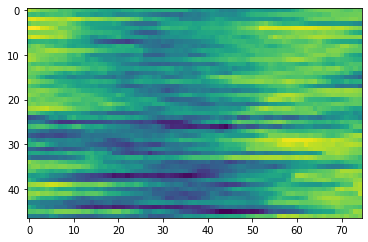

In [18]:
plt.imshow(full_dice_np)

In [48]:
np.argmin(np.mean(full_dice_np,axis=1))

24

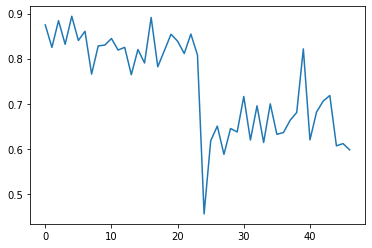

In [47]:
plt.plot(np.mean(full_dice_np,axis=1))

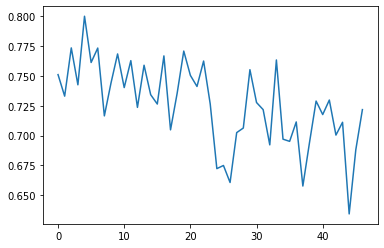

In [17]:
plt.plot(np.mean(full_dice_np,axis=1))

In [78]:
file_ind = 25

stack_slices = np.load(stack_files_npy[file_ind])[175:250]
mask_slices = np.load(mask_files_npy[file_ind])[175:250]

stack_list = []
mask_list = []
stack_like = np.zeros((stack_slices.shape[0],stack_slices.shape[0]))
mask_like = np.zeros((mask_slices.shape[0],mask_slices.shape[0]))

for i in range(stack_like.shape[0]):
    stack_list.append(squarify(stack_slices[i],0,change_dim=1)[:256,:256])
    mask_list.append(squarify(mask_slices[i],0,change_dim=1)[:256,:256])

temp_u_stack = np.asarray(np.expand_dims(stack_list, axis=-1))
temp_u_mask = np.expand_dims(mask_list, axis=-1)
pred_mask = model.predict(temp_u_stack)

In [80]:
pred_mask = model.predict(temp_u_stack)

In [82]:
temp_dice = []

for img_ind in range(temp_u_stack.shape[0]):
    temp_dice.append(dice(temp_u_mask[img_ind],pred_mask[img_ind]))

In [20]:
np.argmin(np.asarray(full_dice_np))

3418

In [95]:
np.argpartition(np.mean(full_dice,axis=1),5)[:5]

array([26, 45, 25, 44, 17], dtype=int64)

In [57]:
i = 1

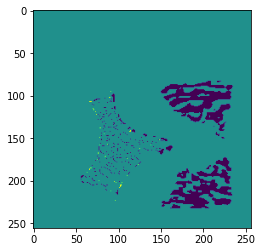

In [58]:
plt.imshow(temp_u_mask[i]-pred_mask[i])

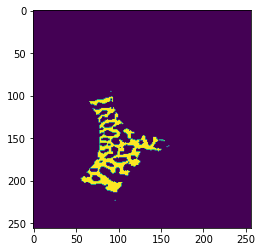

In [59]:
plt.imshow(temp_u_mask[i])

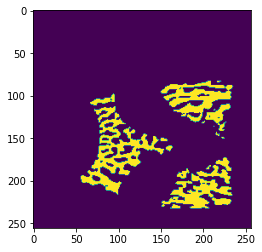

In [60]:
plt.imshow(pred_mask[i])

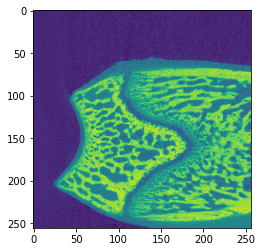

In [61]:
plt.imshow(temp_u_stack[i])

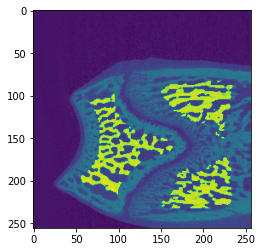

In [62]:
plt.imshow(cv2.addWeighted(np.float32(pred_mask[i]), 1,np.float32(temp_u_stack[i]), .00009,  0,dtype=5))

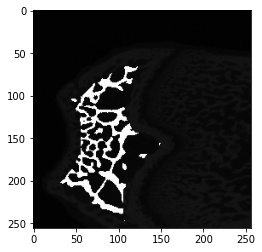

In [69]:
plt.imshow(cv2.addWeighted(np.float32(temp_u_mask[36]), 1,np.float32(temp_u_stack[36]), .00001,  0,dtype=5))

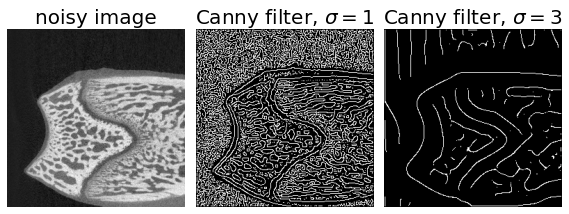

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = temp_u_stack[i,:,:,0]# np.zeros((128, 128))
#im[32:-32, 32:-32] = 1

#im = ndi.gaussian_filter(im, 4)
#im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=9)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

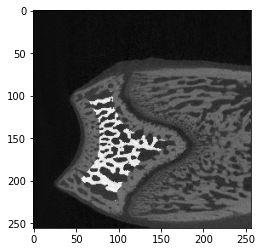

In [104]:
plt.imshow(cv2.addWeighted(np.float32(temp_u_mask[i]), 1,np.float32(temp_u_stack[i]), .0001,  0,dtype=5))

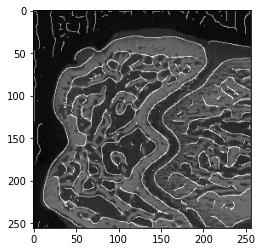

In [182]:
i=70
im=temp_u_stack[i,:,:,0]
plt.imshow(cv2.addWeighted(np.float32(feature.canny(im, sigma=5)), 1,np.float32(temp_u_stack[i]), .0001,  0,dtype=5))

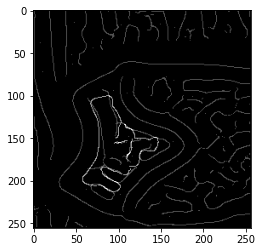

In [158]:
temp = temp_u_mask[i,:,:,0]
#plt.imshow(feature.canny(temp,sigma=1))

plt.imshow(cv2.addWeighted(np.float32(edges2), .5,np.float32(feature.canny((temp).astype(np.float32),sigma=5)), 1,  0,dtype=5))

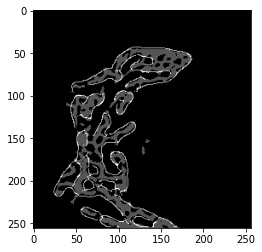

In [172]:
i=70
plt.imshow(cv2.addWeighted(np.float32(temp_u_mask[i,:,:,0]), .5,np.float32(feature.canny((temp_u_mask[i,:,:,0]).astype(np.float32),sigma=5)), 1,  0,dtype=5))

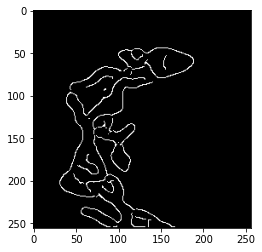

In [224]:
plt.imshow(feature.canny((temp_u_mask[i,:,:,0]).astype(np.float32),sigma=5))

In [225]:
temp_u_mask.shape

(75, 256, 256, 1)

In [136]:
temp_u_mask[0,200]*2+1

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
    

(array([ 1.,  1.,  1.,  6.,  8.,  4.,  6., 11.,  4.,  5.]),
 array([0.59143314, 0.60894799, 0.62646283, 0.64397768, 0.66149253,
        0.67900737, 0.69652222, 0.71403706, 0.73155191, 0.74906675,
        0.7665816 ]),
 <BarContainer object of 10 artists>)

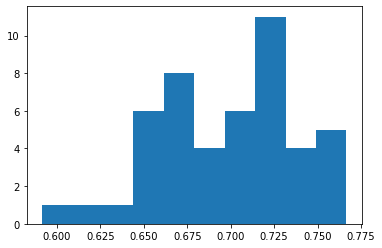

In [79]:
plt.hist(np.mean(full_dice,axis=1))

(array([ 2.,  4.,  4.,  6., 15., 17.,  8., 10.,  5.,  4.]),
 array([0.42768444, 0.45798619, 0.48828795, 0.5185897 , 0.54889145,
        0.57919321, 0.60949496, 0.63979671, 0.67009847, 0.70040022,
        0.73070197]),
 <BarContainer object of 10 artists>)

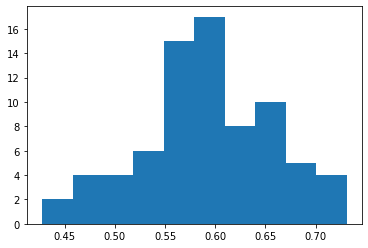

In [91]:
plt.hist(temp_dice)

In [ ]:
#worst was 25

In [134]:
full_std = []
for file_ind in range(47):
    stack_slices = np.load(stack_files_npy[file_ind])
    stack_list = []

    for i in range(300):
        stack_list.append(squarify(stack_slices[i],0,change_dim=1)[100:300][:256,:256])
 
    for img_ind in range(300):
        full_std.append(np.std((np.std(np.asarray(stack_list),axis=0))))
    print("index:",file_ind)

index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
index: 46


In [108]:
np.mean(np.asarray(full_std[1]))

1810.0388

In [234]:
full_std_np = np.asarray(full_std)

In [235]:
full_std_np = full_std_np.reshape(47,-1)

In [236]:
full_std_np = np.mean(full_std_np,axis=1)

In [49]:
full_std_np.shape

NameError: name 'full_std_np' is not defined

In [239]:
np.min(full_std_np)

745.55914

(array([ 1.,  0.,  0.,  8.,  6.,  7.,  0.,  4., 14.,  7.]),
 array([0.45533326, 0.4991999 , 0.54306654, 0.58693318, 0.63079982,
        0.67466646, 0.7185331 , 0.76239974, 0.80626638, 0.85013302,
        0.89399966]),
 <BarContainer object of 10 artists>)

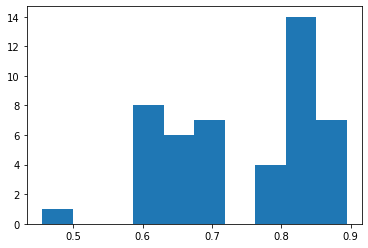

In [51]:
plt.hist(np.mean(full_dice_np,axis=1))

In [197]:
np.argmax(full_std_np)

16

In [194]:
full_std_np.shape

(47,)

In [241]:
N=10
np.argsort(full_std_np)[:10]

array([44, 26, 45, 38, 43, 39, 41, 35, 37, 42], dtype=int64)

In [242]:
N=10
np.argsort(pred_dice_ind)[:10]

array([25, 45, 44, 26, 17, 39, 36, 16, 37, 28], dtype=int64)

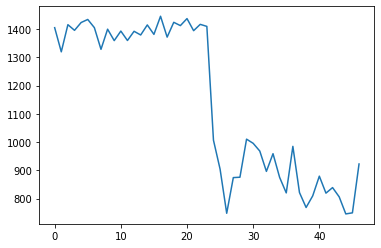

In [198]:
plt.plot(full_std_np)

In [210]:
pred_dice_ind = np.mean(np.asarray(full_dice),axis=1)

In [211]:
np.argmin(pred_dice_ind)

25

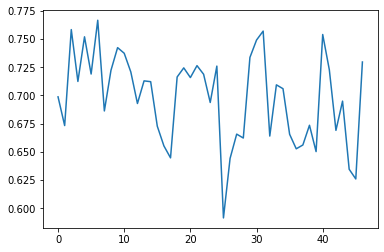

In [212]:
plt.plot(pred_dice_ind)

In [218]:
np.corrcoef(pred_dice_ind,full_std_np)[0,1]

0.4381449738354698